# Part I: Data Collection & Cleaning

In [61]:
import pandas as pd
df = pd.read_csv("ramen-ratings.csv")
df

Review #           Brand  \
0         2580       New Touch   
1         2579        Just Way   
2         2578          Nissin   
3         2577         Wei Lih   
4         2576  Ching's Secret   
...        ...             ...   
2575         5           Vifon   
2576         4         Wai Wai   
2577         3         Wai Wai   
2578         2         Wai Wai   
2579         1        Westbrae   

                                                Variety Style   Country Stars  \
0                             T's Restaurant Tantanmen    Cup     Japan  3.75   
1     Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack    Taiwan     1   
2                         Cup Noodles Chicken Vegetable   Cup       USA  2.25   
3                         GGE Ramen Snack Tomato Flavor  Pack    Taiwan  2.75   
4                                       Singapore Curry  Pack     India  3.75   
...                                                 ...   ...       ...   ...   
2575  Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...  Bowl   Vietnam   3.5   
2576                     Oriental Style Instant Noodles  Pack  Thailand     1   
2577                                     Tom Yum Shrimp  Pack  Thailand     2   
2578                               Tom Yum Chili Flavor  Pack  Thailand     2   
2579                                         Miso Ramen  Pack       USA   0.5   

     Top Ten  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
2575     NaN  
2576     NaN  
2577     NaN  
2578     NaN  
2579     NaN  

[2580 rows x 7 columns]

In [62]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title = "Ramen Ratings Profile Report")
# profile

In [63]:
# find rows with missing data
df.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [64]:
# remove columns Review # Top Ten 
df = df.drop(["Review #", "Top Ten"], axis=1)
df

Brand                                            Variety Style  \
0          New Touch                          T's Restaurant Tantanmen    Cup   
1           Just Way  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack   
2             Nissin                      Cup Noodles Chicken Vegetable   Cup   
3            Wei Lih                      GGE Ramen Snack Tomato Flavor  Pack   
4     Ching's Secret                                    Singapore Curry  Pack   
...              ...                                                ...   ...   
2575           Vifon  Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...  Bowl   
2576         Wai Wai                     Oriental Style Instant Noodles  Pack   
2577         Wai Wai                                     Tom Yum Shrimp  Pack   
2578         Wai Wai                               Tom Yum Chili Flavor  Pack   
2579        Westbrae                                         Miso Ramen  Pack   

       Country Stars  
0        Japan  3.75  
1       Taiwan     1  
2          USA  2.25  
3       Taiwan  2.75  
4        India  3.75  
...        ...   ...  
2575   Vietnam   3.5  
2576  Thailand     1  
2577  Thailand     2  
2578  Thailand     2  
2579       USA   0.5  

[2580 rows x 5 columns]

In [65]:
# remove rows with null value in Style column
print(df["Style"].unique())
print(df[df.isnull().any(axis=1)])
df = df.dropna()
df

['Cup' 'Pack' 'Tray' 'Bowl' 'Box' 'Can' 'Bar' nan]
       Brand            Variety Style Country Stars
2152  Kamfen     E Menm Chicken   NaN   China  3.75
2442    Unif  100 Furong Shrimp   NaN  Taiwan     3


Brand                                            Variety Style  \
0          New Touch                          T's Restaurant Tantanmen    Cup   
1           Just Way  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack   
2             Nissin                      Cup Noodles Chicken Vegetable   Cup   
3            Wei Lih                      GGE Ramen Snack Tomato Flavor  Pack   
4     Ching's Secret                                    Singapore Curry  Pack   
...              ...                                                ...   ...   
2575           Vifon  Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...  Bowl   
2576         Wai Wai                     Oriental Style Instant Noodles  Pack   
2577         Wai Wai                                     Tom Yum Shrimp  Pack   
2578         Wai Wai                               Tom Yum Chili Flavor  Pack   
2579        Westbrae                                         Miso Ramen  Pack   

       Country Stars  
0        Japan  3.75  
1       Taiwan     1  
2          USA  2.25  
3       Taiwan  2.75  
4        India  3.75  
...        ...   ...  
2575   Vietnam   3.5  
2576  Thailand     1  
2577  Thailand     2  
2578  Thailand     2  
2579       USA   0.5  

[2578 rows x 5 columns]

In [66]:
# check rows with missing data
df.isnull().sum()

Brand      0
Variety    0
Style      0
Country    0
Stars      0
dtype: int64

In [67]:
# check the unique value in Stars column
df['Stars'].value_counts()

4          384
5          369
3.75       349
3.5        326
3          172
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
0           26
1           26
2.25        21
0.5         14
0.25        11
5.0         10
1.25        10
3.50         9
5.00         7
4.00         6
4.3          4
4.50         3
3.8          3
Unrated      3
4.0          3
3.1          2
1.1          2
4.125        2
2.3          2
2.9          2
3.0          2
2.8          2
3.4          1
3.6          1
2.1          1
0.1          1
3.125        1
3.3          1
0.9          1
3.65         1
3.00         1
3.7          1
2.85         1
3.2          1
0.75         1
2.125        1
1.8          1
Name: Stars, dtype: int64

In [68]:
# Unrated      3
# clean Stars column
df["Stars"] = pd.to_numeric(df["Stars"], errors="coerce")
print(df["Stars"].value_counts())
print()

# find nan in Stars column
print(df.isnull().sum())

# remove nan from Stars column
df = df.dropna()
df.isnull().sum()


4.000    393
5.000    386
3.750    349
3.500    335
3.000    175
3.250    170
4.250    143
4.500    135
2.750     85
2.000     68
2.500     67
4.750     64
1.500     37
1.750     27
1.000     26
0.000     26
2.250     21
0.500     14
0.250     11
1.250     10
4.300      4
3.800      3
2.900      2
2.800      2
3.100      2
2.300      2
1.100      2
4.125      2
3.650      1
3.600      1
3.700      1
3.400      1
3.125      1
2.850      1
0.100      1
1.800      1
3.200      1
2.100      1
3.300      1
2.125      1
0.750      1
0.900      1
Name: Stars, dtype: int64

Brand      0
Variety    0
Style      0
Country    0
Stars      3
dtype: int64


C:\Users\Scott\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Brand      0
Variety    0
Style      0
Country    0
Stars      0
dtype: int64

In [69]:
df.columns

Index(['Brand', 'Variety', 'Style', 'Country', 'Stars'], dtype='object')

In [99]:
# check numeric values in other column (string value will be converted to null value)
for col in df.columns:
    null = pd.to_numeric(df[col], errors="coerce").notnull().all()
    print(col, null)

Brand False
Variety False
Style False
Country False
Stars True


- no numeric value in other columns

In [102]:
df.to_csv("cleaned-ramen-ratings.csv", index=False)

# Part II: Feature Extraction, Data Visualization & Statistics

## Feature Extraction

In [103]:
import pandas as pd
import string
import collections
import nltk

In [141]:
df = pd.read_csv("cleaned-ramen-ratings.csv")
df.head()
# len(df)

Brand                                            Variety Style  \
0       New Touch                          T's Restaurant Tantanmen    Cup   
1        Just Way  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack   
2          Nissin                      Cup Noodles Chicken Vegetable   Cup   
3         Wei Lih                      GGE Ramen Snack Tomato Flavor  Pack   
4  Ching's Secret                                    Singapore Curry  Pack   

  Country  Stars  
0   Japan   3.75  
1  Taiwan   1.00  
2     USA   2.25  
3  Taiwan   2.75  
4   India   3.75

In [107]:
# get variety column
variety = df["Variety"]
variety.head()

0                            T's Restaurant Tantanmen 
1    Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...
2                        Cup Noodles Chicken Vegetable
3                        GGE Ramen Snack Tomato Flavor
4                                      Singapore Curry
Name: Variety, dtype: object

###### extract more info from variety column

In [117]:
# convert value in variety column into a string
variety_text = " ".join(variety)
variety_text

'T\'s Restaurant Tantanmen  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles Cup Noodles Chicken Vegetable GGE Ramen Snack Tomato Flavor Singapore Curry Kimchi song Song Ramen Spice Deli Tantan Men With Cilantro Nabeyaki Kitsune Udon Hokkaido Soy Sauce Ramen The Original Spicy Stir-Fried Noodles Creamy tom Yum Kung Flavour Yokohama Tonkotsu Shoyu Mr. Bibim Stir-Fried Kimchi Flavor Deka Buto Kimchi Pork Flavor Demae Ramen Bar Noodle Aka Tonkotsu Flavour Instant Noodle Mushroom Flavour Instant Noodles Mario Masala Noodles Tokyo Shoyu Ramen Mi Hai Cua Premium Gomtang Cup Noodles Laksa Flavour Beef Ramen Creamy Soup With Crushed Noodles Hot & Sour Fish Flavor Sapporo Miso Ramen Hot Garlic Instant Noodles Song Song Kimchi Big Bowl Instant Noodles Beef In Light Soup Flavour Hakata Ramen Noodle White Tonkotsu Penang White Curry Rice Vermicelli Soup Signature Tom Yum Flavor Instant Noodles Paegaejang Ramen Gekikara Ramen Extra Hot Ramen Goreng Chongqing Spicy Hot Noodles Sugo-Men Ky

In [113]:
# convert text to small letter
variety_text_lower = variety_text.lower()
variety_text_lower

't\'s restaurant tantanmen  noodles spicy hot sesame spicy hot sesame guan-miao noodles cup noodles chicken vegetable gge ramen snack tomato flavor singapore curry kimchi song song ramen spice deli tantan men with cilantro nabeyaki kitsune udon hokkaido soy sauce ramen the original spicy stir-fried noodles creamy tom yum kung flavour yokohama tonkotsu shoyu mr. bibim stir-fried kimchi flavor deka buto kimchi pork flavor demae ramen bar noodle aka tonkotsu flavour instant noodle mushroom flavour instant noodles mario masala noodles tokyo shoyu ramen mi hai cua premium gomtang cup noodles laksa flavour beef ramen creamy soup with crushed noodles hot & sour fish flavor sapporo miso ramen hot garlic instant noodles song song kimchi big bowl instant noodles beef in light soup flavour hakata ramen noodle white tonkotsu penang white curry rice vermicelli soup signature tom yum flavor instant noodles paegaejang ramen gekikara ramen extra hot ramen goreng chongqing spicy hot noodles sugo-men ky

In [112]:
# punctuation list
punc_list = list(string.punctuation)
punc_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [114]:
# print the letter in the variety_text_lower if it's not in punctuation list
[char for char in variety_text_lower if char not in punc_list]

['t',
 's',
 ' ',
 'r',
 'e',
 's',
 't',
 'a',
 'u',
 'r',
 'a',
 'n',
 't',
 ' ',
 't',
 'a',
 'n',
 't',
 'a',
 'n',
 'm',
 'e',
 'n',
 ' ',
 ' ',
 'n',
 'o',
 'o',
 'd',
 'l',
 'e',
 's',
 ' ',
 's',
 'p',
 'i',
 'c',
 'y',
 ' ',
 'h',
 'o',
 't',
 ' ',
 's',
 'e',
 's',
 'a',
 'm',
 'e',
 ' ',
 's',
 'p',
 'i',
 'c',
 'y',
 ' ',
 'h',
 'o',
 't',
 ' ',
 's',
 'e',
 's',
 'a',
 'm',
 'e',
 ' ',
 'g',
 'u',
 'a',
 'n',
 'm',
 'i',
 'a',
 'o',
 ' ',
 'n',
 'o',
 'o',
 'd',
 'l',
 'e',
 's',
 ' ',
 'c',
 'u',
 'p',
 ' ',
 'n',
 'o',
 'o',
 'd',
 'l',
 'e',
 's',
 ' ',
 'c',
 'h',
 'i',
 'c',
 'k',
 'e',
 'n',
 ' ',
 'v',
 'e',
 'g',
 'e',
 't',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'g',
 'g',
 'e',
 ' ',
 'r',
 'a',
 'm',
 'e',
 'n',
 ' ',
 's',
 'n',
 'a',
 'c',
 'k',
 ' ',
 't',
 'o',
 'm',
 'a',
 't',
 'o',
 ' ',
 'f',
 'l',
 'a',
 'v',
 'o',
 'r',
 ' ',
 's',
 'i',
 'n',
 'g',
 'a',
 'p',
 'o',
 'r',
 'e',
 ' ',
 'c',
 'u',
 'r',
 'r',
 'y',
 ' ',
 'k',
 'i',
 'm',
 'c',
 'h',
 'i',
 ' '

In [116]:
# create a string of text without punctuation
variety_text_clean = "".join([char for char in variety_text_lower if char not in punc_list])
variety_text_clean

'ts restaurant tantanmen  noodles spicy hot sesame spicy hot sesame guanmiao noodles cup noodles chicken vegetable gge ramen snack tomato flavor singapore curry kimchi song song ramen spice deli tantan men with cilantro nabeyaki kitsune udon hokkaido soy sauce ramen the original spicy stirfried noodles creamy tom yum kung flavour yokohama tonkotsu shoyu mr bibim stirfried kimchi flavor deka buto kimchi pork flavor demae ramen bar noodle aka tonkotsu flavour instant noodle mushroom flavour instant noodles mario masala noodles tokyo shoyu ramen mi hai cua premium gomtang cup noodles laksa flavour beef ramen creamy soup with crushed noodles hot  sour fish flavor sapporo miso ramen hot garlic instant noodles song song kimchi big bowl instant noodles beef in light soup flavour hakata ramen noodle white tonkotsu penang white curry rice vermicelli soup signature tom yum flavor instant noodles paegaejang ramen gekikara ramen extra hot ramen goreng chongqing spicy hot noodles sugomen kyoto back

In [118]:
# tokenization
variety_tokens = nltk.tokenize.word_tokenize(variety_text_clean)
variety_tokens

['ts',
 'restaurant',
 'tantanmen',
 'noodles',
 'spicy',
 'hot',
 'sesame',
 'spicy',
 'hot',
 'sesame',
 'guanmiao',
 'noodles',
 'cup',
 'noodles',
 'chicken',
 'vegetable',
 'gge',
 'ramen',
 'snack',
 'tomato',
 'flavor',
 'singapore',
 'curry',
 'kimchi',
 'song',
 'song',
 'ramen',
 'spice',
 'deli',
 'tantan',
 'men',
 'with',
 'cilantro',
 'nabeyaki',
 'kitsune',
 'udon',
 'hokkaido',
 'soy',
 'sauce',
 'ramen',
 'the',
 'original',
 'spicy',
 'stirfried',
 'noodles',
 'creamy',
 'tom',
 'yum',
 'kung',
 'flavour',
 'yokohama',
 'tonkotsu',
 'shoyu',
 'mr',
 'bibim',
 'stirfried',
 'kimchi',
 'flavor',
 'deka',
 'buto',
 'kimchi',
 'pork',
 'flavor',
 'demae',
 'ramen',
 'bar',
 'noodle',
 'aka',
 'tonkotsu',
 'flavour',
 'instant',
 'noodle',
 'mushroom',
 'flavour',
 'instant',
 'noodles',
 'mario',
 'masala',
 'noodles',
 'tokyo',
 'shoyu',
 'ramen',
 'mi',
 'hai',
 'cua',
 'premium',
 'gomtang',
 'cup',
 'noodles',
 'laksa',
 'flavour',
 'beef',
 'ramen',
 'creamy',
 'soup

In [123]:
# look at the words with highest frequency 
variety_counter = collections.Counter(variety_tokens)
variety_counter.most_common()

[('noodles', 674),
 ('noodle', 518),
 ('instant', 446),
 ('flavour', 406),
 ('ramen', 341),
 ('chicken', 328),
 ('flavor', 323),
 ('spicy', 276),
 ('beef', 233),
 ('cup', 197),
 ('soup', 195),
 ('with', 170),
 ('sauce', 145),
 ('rice', 143),
 ('artificial', 133),
 ('tom', 128),
 ('curry', 127),
 ('shrimp', 126),
 ('mi', 123),
 ('hot', 119),
 ('seafood', 109),
 ('bowl', 104),
 ('pork', 102),
 ('style', 90),
 ('yum', 87),
 ('goreng', 79),
 ('udon', 78),
 ('vermicelli', 59),
 ('demae', 58),
 ('oriental', 58),
 ('sesame', 56),
 ('penang', 54),
 ('vegetable', 53),
 ('tonkotsu', 53),
 ('yakisoba', 51),
 ('mushroom', 50),
 ('ramyun', 47),
 ('vegetarian', 47),
 ('rasa', 46),
 ('soy', 43),
 ('sour', 43),
 ('black', 43),
 ('kimchi', 42),
 ('miso', 42),
 ('chow', 41),
 ('big', 40),
 ('shoyu', 38),
 ('japanese', 38),
 ('fried', 38),
 ('onion', 37),
 ('mein', 37),
 ('creamy', 36),
 ('king', 36),
 ('a', 36),
 ('tomato', 35),
 ('laksa', 35),
 ('super', 35),
 ('thai', 35),
 ('oil', 34),
 ('korean', 33

In [144]:
# create a new column - isSpicy, with value 1 if a variety contains the word related to spicy, else 0 
is_spicy = []
hot_flavor = ["spicy", "curry", "hot", "tom yum", "chili", "chilli", "kari", "pedas", "laksa"]

for variety in df["Variety"].str.lower():
    if any(flavor in variety for flavor in hot_flavor):
#         print(variety)
        is_spicy.append(1)
    else:
        is_spicy.append(0)
# is_spicy
df["isSpicy"] = is_spicy
df

Brand  \
0                           New Touch   
1                            Just Way   
2                              Nissin   
3                             Wei Lih   
4                      Ching's Secret   
5                       Samyang Foods   
6                             Acecook   
7                         Ikeda Shoku   
8                          Ripe'n'Dry   
9                                KOKA   
10                        Tao Kae Noi   
11                           Yamachan   
12                           Nongshim   
13                             Nissin   
14                             Nissin   
15                               KOKA   
16                               TRDP   
17                           Yamachan   
18                           Binh Tay   
19                              Paldo   
20                             Nissin   
21                   Jackpot Teriyaki   
22                               KOKA   
23                           Yamachan   
24                     Ching's Secret   
25                      Samyang Foods   
26                            Yum-Mie   
27                             Nissin   
28                            MyKuali   
29                               KOKA   
30                      Samyang Foods   
31                             Nissin   
32                   Sichuan Guangyou   
33                          New Touch   
34                               KOKA   
35                             Lipton   
36                               KOKA   
37                            Acecook   
38                             Nissin   
39                            Wei Lih   
40                             Nissin   
41                             Nissin   
42                             Nissin   
43                               Lele   
44                             Nissin   
45                           Fujiwara   
46                           Nongshim   
47                             Nissin   
48                      Uni-President   
49                             Ottogi   
50                           Maruchan   
51                              Prima   
52                      Uni-President   
53                      Samyang Foods   
54                           Sokensha   
55                             Nissin   
56                           Nongshim   
57                           Takamori   
58                             Nissin   
59                             Nissin   
60                        Guava Story   
61                      Samurai Ramen   
62                        Ikeda Shoku   
63                           Fujiwara   
64                      Uni-President   
65                          Ogasawara   
66                           Pringles   
67                   Mom's Dry Noodle   
68                      Samyang Foods   
69                            MyKuali   
70                              Maggi   
71                      Samyang Foods   
72                            Indomie   
73                               KOKA   
74                            Acecook   
75                           Nongshim   
76                   Sichuan Guangyou   
77                            Indomie   
78                         Happy Cook   
79             The Ramen Rater Select   
80                               KOKA   
81                             Nissin   
82                             Nissin   
83                             Nissin   
84                             Nissin   
85                             Nissin   
86                             Nissin   
87                             Nissin   
88                             Nissin   
89                             Nissin   
90                             Nissin   
91                             Nissin   
92                             Nissin   
93                             Nissin   
94                             Nissin   
95                             Nissin   
96                              Paldo   
97            

In [145]:
# create a new column - hasChicken, with value 1 if a variety contains the word related to chicken, else 0 
has_chicken = []
chicken = ["chicken", "ayam"]

for variety in df["Variety"].str.lower():
    if any(meat in variety for meat in chicken):
        has_chicken.append(1)
    else:
        has_chicken.append(0)
df["hasChicken"] = has_chicken
df

Brand  \
0                           New Touch   
1                            Just Way   
2                              Nissin   
3                             Wei Lih   
4                      Ching's Secret   
5                       Samyang Foods   
6                             Acecook   
7                         Ikeda Shoku   
8                          Ripe'n'Dry   
9                                KOKA   
10                        Tao Kae Noi   
11                           Yamachan   
12                           Nongshim   
13                             Nissin   
14                             Nissin   
15                               KOKA   
16                               TRDP   
17                           Yamachan   
18                           Binh Tay   
19                              Paldo   
20                             Nissin   
21                   Jackpot Teriyaki   
22                               KOKA   
23                           Yamachan   
24                     Ching's Secret   
25                      Samyang Foods   
26                            Yum-Mie   
27                             Nissin   
28                            MyKuali   
29                               KOKA   
30                      Samyang Foods   
31                             Nissin   
32                   Sichuan Guangyou   
33                          New Touch   
34                               KOKA   
35                             Lipton   
36                               KOKA   
37                            Acecook   
38                             Nissin   
39                            Wei Lih   
40                             Nissin   
41                             Nissin   
42                             Nissin   
43                               Lele   
44                             Nissin   
45                           Fujiwara   
46                           Nongshim   
47                             Nissin   
48                      Uni-President   
49                             Ottogi   
50                           Maruchan   
51                              Prima   
52                      Uni-President   
53                      Samyang Foods   
54                           Sokensha   
55                             Nissin   
56                           Nongshim   
57                           Takamori   
58                             Nissin   
59                             Nissin   
60                        Guava Story   
61                      Samurai Ramen   
62                        Ikeda Shoku   
63                           Fujiwara   
64                      Uni-President   
65                          Ogasawara   
66                           Pringles   
67                   Mom's Dry Noodle   
68                      Samyang Foods   
69                            MyKuali   
70                              Maggi   
71                      Samyang Foods   
72                            Indomie   
73                               KOKA   
74                            Acecook   
75                           Nongshim   
76                   Sichuan Guangyou   
77                            Indomie   
78                         Happy Cook   
79             The Ramen Rater Select   
80                               KOKA   
81                             Nissin   
82                             Nissin   
83                             Nissin   
84                             Nissin   
85                             Nissin   
86                             Nissin   
87                             Nissin   
88                             Nissin   
89                             Nissin   
90                             Nissin   
91                             Nissin   
92                             Nissin   
93                             Nissin   
94                             Nissin   
95                             Nissin   
96                              Paldo   
97            

In [164]:
# create a new column - hasBeef, with value 1 if a variety contains the word related to beef, else 0 
has_seafood = []
seafood = ["seafood", "shrimp", "prawn", "crab", "fish"]

for variety in df["Variety"].str.lower():
    if any(meat in variety for meat in seafood):
        has_seafood.append(1)
    else:
        has_seafood.append(0)
df["hasSeafood"] = has_seafood
df

Brand  \
0                           New Touch   
1                            Just Way   
2                              Nissin   
3                             Wei Lih   
4                      Ching's Secret   
5                       Samyang Foods   
6                             Acecook   
7                         Ikeda Shoku   
8                          Ripe'n'Dry   
9                                KOKA   
10                        Tao Kae Noi   
11                           Yamachan   
12                           Nongshim   
13                             Nissin   
14                             Nissin   
15                               KOKA   
16                               TRDP   
17                           Yamachan   
18                           Binh Tay   
19                              Paldo   
20                             Nissin   
21                   Jackpot Teriyaki   
22                               KOKA   
23                           Yamachan   
24                     Ching's Secret   
25                      Samyang Foods   
26                            Yum-Mie   
27                             Nissin   
28                            MyKuali   
29                               KOKA   
30                      Samyang Foods   
31                             Nissin   
32                   Sichuan Guangyou   
33                          New Touch   
34                               KOKA   
35                             Lipton   
36                               KOKA   
37                            Acecook   
38                             Nissin   
39                            Wei Lih   
40                             Nissin   
41                             Nissin   
42                             Nissin   
43                               Lele   
44                             Nissin   
45                           Fujiwara   
46                           Nongshim   
47                             Nissin   
48                      Uni-President   
49                             Ottogi   
50                           Maruchan   
51                              Prima   
52                      Uni-President   
53                      Samyang Foods   
54                           Sokensha   
55                             Nissin   
56                           Nongshim   
57                           Takamori   
58                             Nissin   
59                             Nissin   
60                        Guava Story   
61                      Samurai Ramen   
62                        Ikeda Shoku   
63                           Fujiwara   
64                      Uni-President   
65                          Ogasawara   
66                           Pringles   
67                   Mom's Dry Noodle   
68                      Samyang Foods   
69                            MyKuali   
70                              Maggi   
71                      Samyang Foods   
72                            Indomie   
73                               KOKA   
74                            Acecook   
75                           Nongshim   
76                   Sichuan Guangyou   
77                            Indomie   
78                         Happy Cook   
79             The Ramen Rater Select   
80                               KOKA   
81                             Nissin   
82                             Nissin   
83                             Nissin   
84                             Nissin   
85                             Nissin   
86                             Nissin   
87                             Nissin   
88                             Nissin   
89                             Nissin   
90                             Nissin   
91                             Nissin   
92                             Nissin   
93                             Nissin   
94                             Nissin   
95                             Nissin   
96                              Paldo   
97            

## Data Visualization

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# explore Brand
brand_count = df["Brand"].value_counts()[:50]
brand_count

Nissin              381
Nongshim             98
Maruchan             76
Mama                 71
Paldo                66
Myojo                63
Indomie              53
Samyang Foods        51
Ottogi               45
Vina Acecook         34
Lucky Me!            34
Vifon                33
Maggi                30
Mamee                29
Master Kong          28
MAMA                 27
A-Sha Dry Noodle     26
Wai Wai              25
Sapporo Ichiban      25
KOKA                 25
MyKuali              24
Ve Wong              24
JML                  23
Samyang              19
Koka                 18
Doll                 16
Batchelors           16
Wei Lih              15
Acecook              15
Mr. Noodles          15
Takamori Kosan       14
Sau Tao              14
Little Cook          14
Kamfen               14
Asian Thai Foods     14
Saigon Ve Wong       13
Deshome              13
Dragonfly            13
Vit's                13
Mi Sedaap            12
Uni-President        12
Golden Wheat    

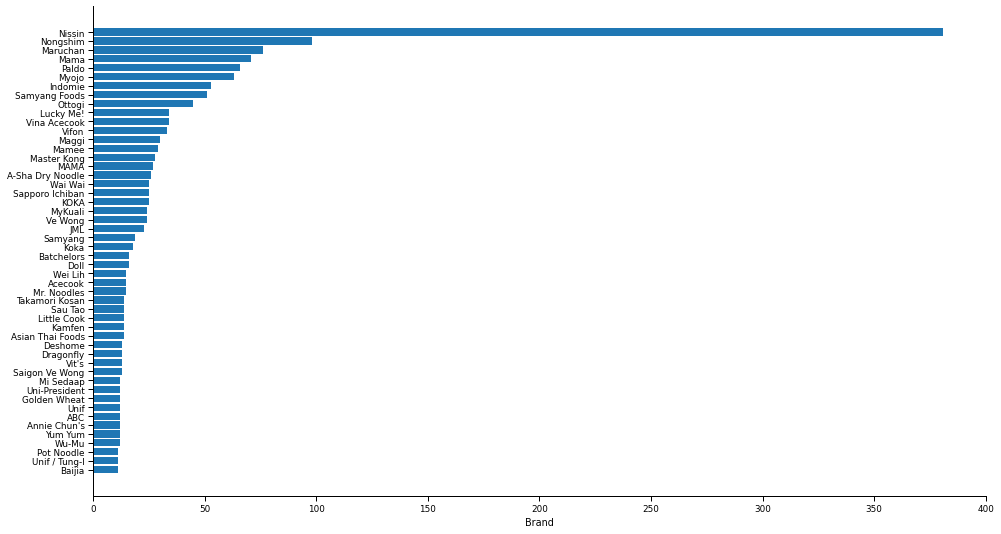

In [217]:
# plot a barplot for brand_count
plt.figure(figsize=(16,9))

# vertical bar
# plt.bar(brand_count.index, brand_count)
# plt.xticks(rotation=90)

# horizontal bar
plt.barh(brand_count.sort_values(ascending=True).index, brand_count.sort_values(ascending=True))
plt.xlabel("Brand")
sns.despine()

In [193]:
# explore Style
style_count = df["Style"].value_counts()
style_count

Pack    1528
Bowl     481
Cup      450
Tray     108
Box        6
Bar        1
Can        1
Name: Style, dtype: int64

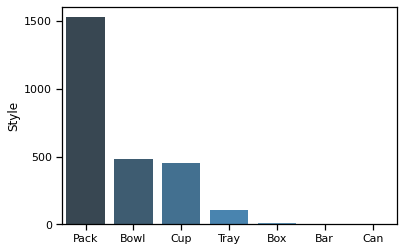

In [196]:
# plot barplot for style_count
ax = sns.barplot(y= style_count, x = style_count.index, palette=("Blues_d"))
sns.set_context("talk")
# set context = "notebook", "talk", "paper", "poster"

In [212]:
# explore Country
country = df["Country"].value_counts()
country

Japan            352
USA              323
South Korea      307
Taiwan           223
Thailand         191
China            168
Malaysia         155
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Hungary            9
Pakistan           9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Dubai              3
Sarawak            3
Sweden             3
Finland            3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

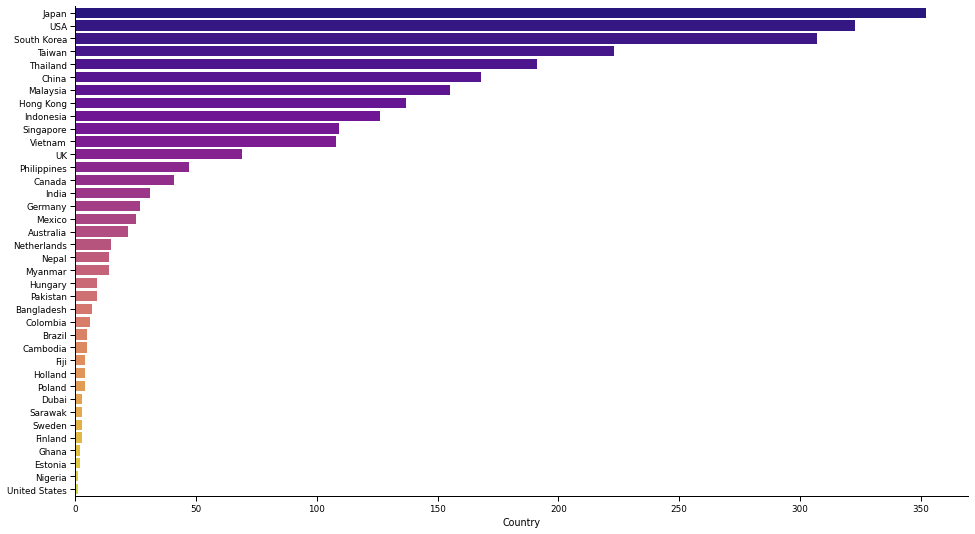

In [216]:
# plot a bar plot for country
plt.figure(figsize=(16,9))
ax = sns.barplot(x=country.values, y=country.index, palette=("plasma"))
ax.set_xlabel("Country")
sns.set_context("paper")
sns.despine()

In [227]:
# explore isSpicy
spicy = df["isSpicy"].value_counts()
spicy

0    1944
1     631
Name: isSpicy, dtype: int64

Text(0.5, 0, 'isSpicy')

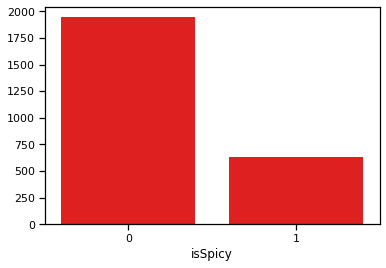

In [243]:
# plot a barplot for spicy
ax = sns.barplot(y=spicy.values, x=spicy.index, color="red")
ax.set_xlabel("isSpicy")

In [234]:
# explore hasChicken
chicken = df["hasChicken"].value_counts()
chicken

0    2224
1     351
Name: hasChicken, dtype: int64

Text(0.5, 0, 'hasChicken')

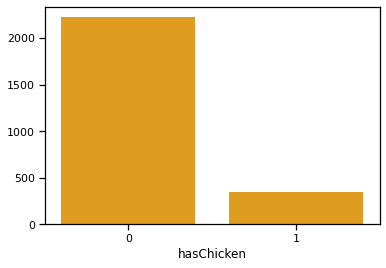

In [246]:
# plot a barplot for chicken
ax = sns.barplot(y=chicken.values, x=chicken.index, color="orange")
ax.set_xlabel("hasChicken")

In [236]:
# explore hasBeef
beef = df["hasBeef"].value_counts()
beef

0    2342
1     233
Name: hasBeef, dtype: int64

Text(0.5, 0, 'hasBeef')

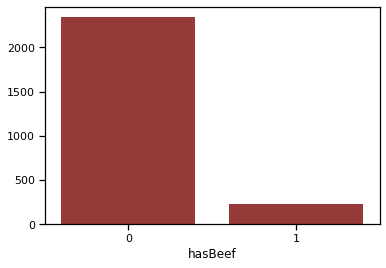

In [247]:
# plot a barplot for beef
ax = sns.barplot(y=beef.values, x=beef.index, color="brown")
ax.set_xlabel("hasBeef")

In [248]:
# explore seafood
seafood = df["hasSeafood"].value_counts()
seafood

0    2275
1     300
Name: hasSeafood, dtype: int64

Text(0.5, 0, 'hasSeafood')

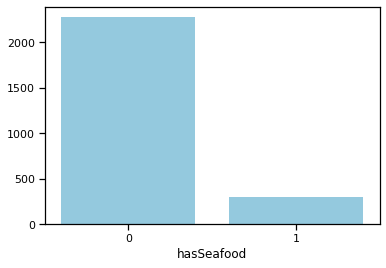

In [252]:
# plot a barplot for seafood
ax = sns.barplot(y=seafood.values, x=seafood.index, color="skyblue")
ax.set_xlabel("hasSeafood")

## Statistics

Questions:
1. Which brand has the highest stars?
2. Which country has the highest stars?
3. Which noodle type has the highest stars (spicy or not spicy)?

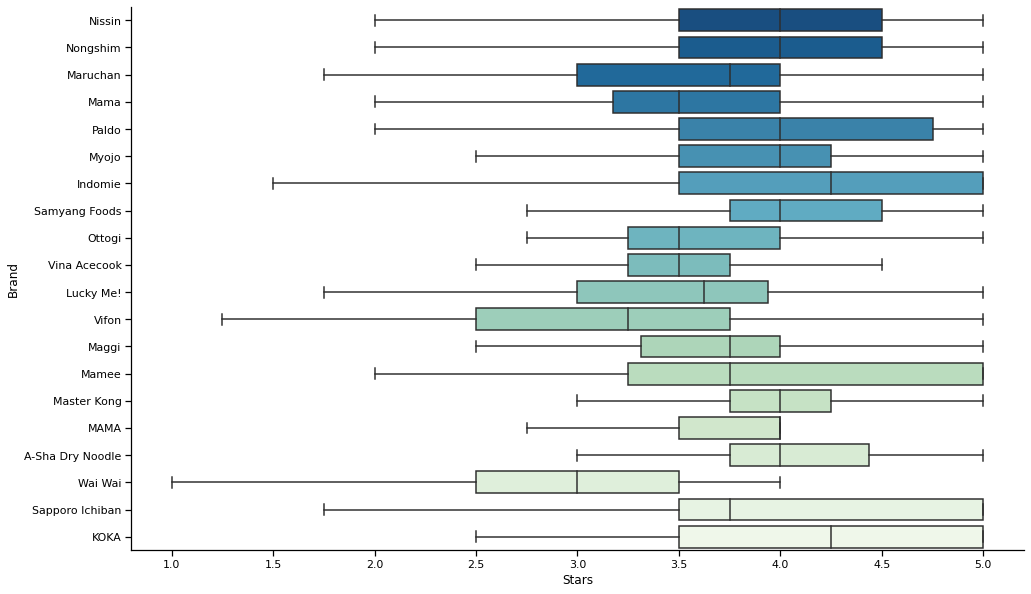

In [275]:
# 1. Which brand has the highest stars?
plt.figure(figsize=(16,10))
sns.boxplot(df["Stars"], df["Brand"], order=brand_count.index[:20], palette="GnBu_r", showfliers=False)
sns.despine()

In [293]:
first_20_brand=brand_count.index[:20]
first_20_brand

Index(['Nissin', 'Nongshim', 'Maruchan', 'Mama', 'Paldo', 'Myojo', 'Indomie',
       'Samyang Foods', 'Ottogi', 'Vina Acecook', 'Lucky Me!', 'Vifon',
       'Maggi', 'Mamee', 'Master Kong', 'MAMA', 'A-Sha Dry Noodle', 'Wai Wai',
       'Sapporo Ichiban', 'KOKA'],
      dtype='object')

In [288]:
df[df["Brand"] == "Koka"]["Stars"].mean()

3.75

In [308]:
print("Average Stars ratings of\n")
for idx, brand in enumerate(first_20_brand):
    mean_rating = round(df[df["Brand"] == brand]["Stars"].mean(), 2)
    print(f"{idx:>3}) {brand:<20} {mean_rating}")

Average Stars ratings of

  0) Nissin               3.92
  1) Nongshim             4.0
  2) Maruchan             3.55
  3) Mama                 3.63
  4) Paldo                4.02
  5) Myojo                3.8
  6) Indomie              4.07
  7) Samyang Foods        4.07
  8) Ottogi               3.39
  9) Vina Acecook         3.54
 10) Lucky Me!            3.29
 11) Vifon                3.05
 12) Maggi                3.68
 13) Mamee                3.94
 14) Master Kong          3.85
 15) MAMA                 3.9
 16) A-Sha Dry Noodle     4.07
 17) Wai Wai              2.93
 18) Sapporo Ichiban      3.83
 19) KOKA                 4.21


In [309]:
print("Top Brand with High Stars Ratings\n")
for idx, brand in enumerate(first_20_brand):
    mean_rating = round(df[df["Brand"] == brand]["Stars"].mean(), 2)
    if mean_rating > 4:
        print(f"{idx:>3}) {brand:<20} {mean_rating}")

Top Brand with High Stars Ratings

  4) Paldo                4.02
  6) Indomie              4.07
  7) Samyang Foods        4.07
 16) A-Sha Dry Noodle     4.07
 19) KOKA                 4.21


#### KOKA brand has the highest stars

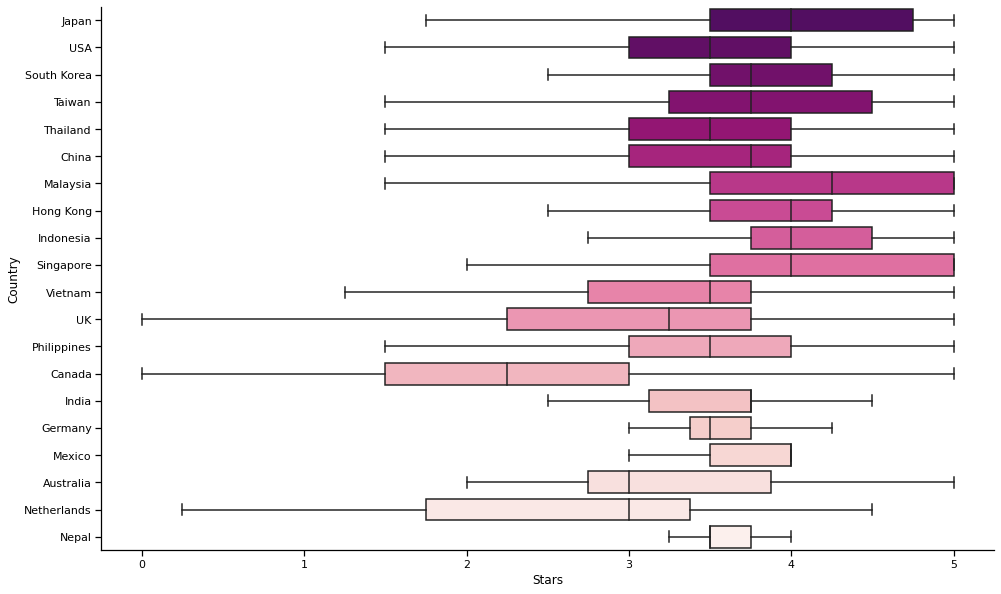

In [311]:
# 2. Which country has the highest stars?
plt.figure(figsize=(16,10))
sns.boxplot(df["Stars"], df["Country"], order=country.index[:20], palette="RdPu_r", showfliers=False)
sns.despine()

In [312]:
first_20_country = country.index[:20]
first_20_country

Index(['Japan', 'USA', 'South Korea', 'Taiwan', 'Thailand', 'China',
       'Malaysia', 'Hong Kong', 'Indonesia', 'Singapore', 'Vietnam', 'UK',
       'Philippines', 'Canada', 'India', 'Germany', 'Mexico', 'Australia',
       'Netherlands', 'Nepal'],
      dtype='object')

In [314]:
print("Top Country with High Stars Ratings\n")
for idx, country in enumerate(first_20_country):
    mean_rating = round(df[df["Country"] == country]["Stars"].mean(), 2)
    if mean_rating > 4:
        print(f"{idx:>3}) {country:<20} {mean_rating}")

Top Country with High Stars Ratings

  6) Malaysia             4.15
  8) Indonesia            4.07
  9) Singapore            4.13


#### Malaysia has the highest stars

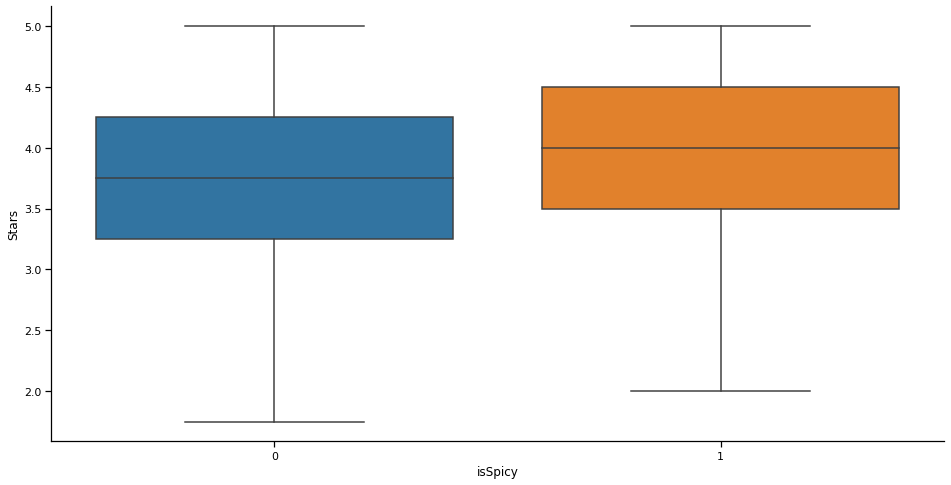

In [318]:
# 3. Which noodle type has the highest stars (spicy or not spicy)?
plt.figure(figsize=(16,8))
sns.boxplot(df["isSpicy"], df["Stars"], showfliers=False)
sns.despine()

In [322]:
notSpicy = df[df['isSpicy'] == 0]
spicy = df[df['isSpicy'] == 1]

print(notSpicy["Stars"].mean())
print(spicy["Stars"].mean())

3.6068287037037043
3.8029714738510303


In [323]:
print(notSpicy["Stars"].median())
print(spicy["Stars"].median())

3.75
4.0


#### Spicy noodle has the higher stars

(array([  7.,   5.,   7.,   9.,  26.,  23.,  70., 164., 141., 179.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

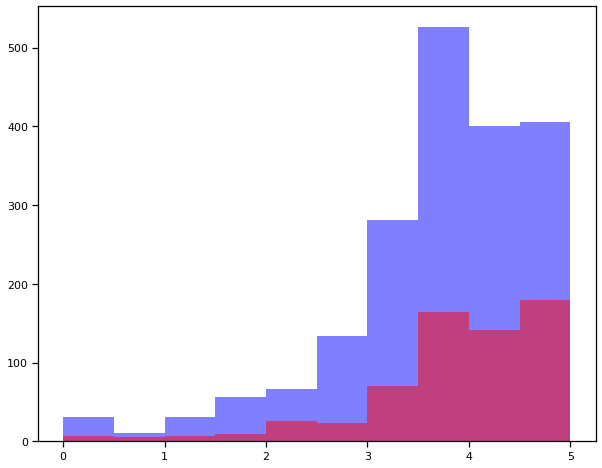

In [335]:
plt.figure(figsize=(10,8))
plt.hist(notSpicy["Stars"], alpha=.5, color="blue")
plt.hist(spicy["Stars"], alpha=.5, color="red")

<AxesSubplot:xlabel='Stars'>

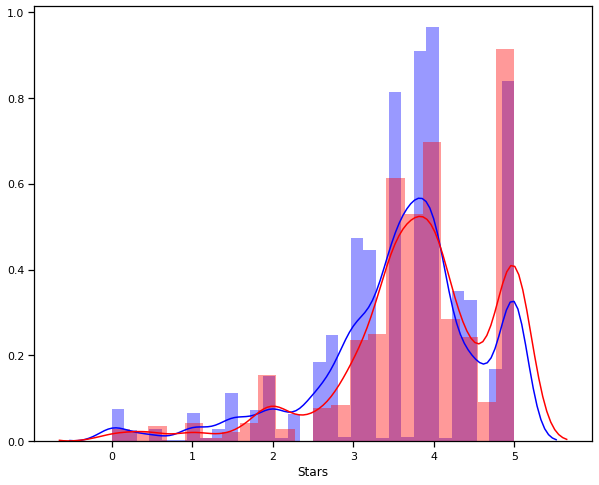

In [334]:
plt.figure(figsize=(10,8))
sns.distplot(notSpicy["Stars"], color="blue")
sns.distplot(spicy["Stars"], color="red")

In [336]:
# import mann-whitney u test
from scipy.stats import mannwhitneyu

In [337]:
mannwhitneyu(notSpicy["Stars"], spicy["Stars"])

MannwhitneyuResult(statistic=536833.0, pvalue=1.046431078206525e-06)

#### spicy is statistically different from not spicy

<AxesSubplot:xlabel='hasChicken', ylabel='Stars'>

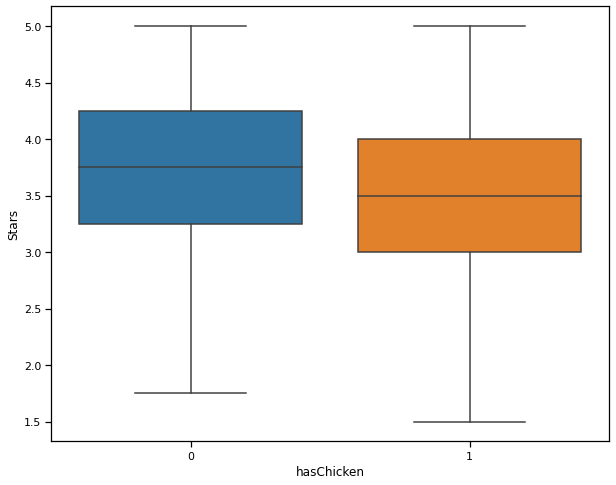

In [339]:
plt.figure(figsize=(10,8))
sns.boxplot(df["hasChicken"], df["Stars"], showfliers=False)

In [340]:
mannwhitneyu(df[df["hasChicken"]==0]["Stars"], df[df["hasChicken"]==1]["Stars"])

MannwhitneyuResult(statistic=319586.5, pvalue=1.9172813948031262e-08)

<AxesSubplot:xlabel='hasBeef', ylabel='Stars'>

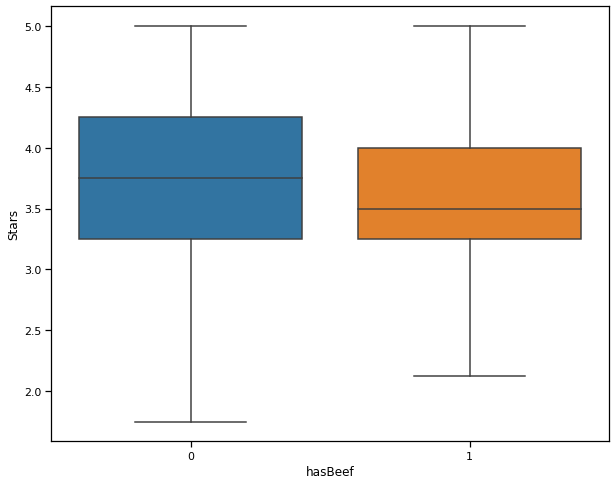

In [341]:
plt.figure(figsize=(10,8))
sns.boxplot(df["hasBeef"], df["Stars"], showfliers=False)

In [342]:
mannwhitneyu(df[df["hasBeef"]==0]["Stars"], df[df["hasBeef"]==1]["Stars"])

MannwhitneyuResult(statistic=239589.0, pvalue=0.0009939831714914308)

<AxesSubplot:xlabel='hasSeafood', ylabel='Stars'>

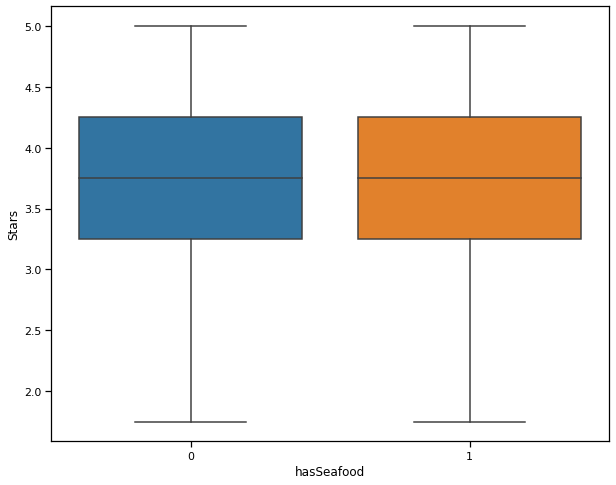

In [343]:
plt.figure(figsize=(10,8))
sns.boxplot(df["hasSeafood"], df["Stars"], showfliers=False)

In [344]:
mannwhitneyu(df[df["hasSeafood"]==0]["Stars"], df[df["hasSeafood"]==1]["Stars"])

MannwhitneyuResult(statistic=337410.0, pvalue=0.374777009041239)

In [346]:
df.to_csv("extended-clean-ramen-ratings.csv", index=False)

## Part III: Feature Engineering & Data Preparation

In [3]:
df = pd.read_csv("extended-clean-ramen-ratings.csv")
df.head()

Brand                                            Variety Style  \
0       New Touch                          T's Restaurant Tantanmen    Cup   
1        Just Way  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack   
2          Nissin                      Cup Noodles Chicken Vegetable   Cup   
3         Wei Lih                      GGE Ramen Snack Tomato Flavor  Pack   
4  Ching's Secret                                    Singapore Curry  Pack   

  Country  Stars  isSpicy  hasChicken  hasBeef  hasSeafood  
0   Japan   3.75        0           0        0           0  
1  Taiwan   1.00        1           0        0           0  
2     USA   2.25        0           1        0           0  
3  Taiwan   2.75        0           0        0           0  
4   India   3.75        1           0        0           0

In [4]:
# get top 30 brands
# df["Brand"].value_counts()[:30]
top_30_brands = df["Brand"].value_counts()[:30].index
top_30_brands

Index(['Nissin', 'Nongshim', 'Maruchan', 'Mama', 'Paldo', 'Myojo', 'Indomie',
       'Samyang Foods', 'Ottogi', 'Lucky Me!', 'Vina Acecook', 'Vifon',
       'Maggi', 'Mamee', 'Master Kong', 'MAMA', 'A-Sha Dry Noodle', 'Wai Wai',
       'KOKA', 'Sapporo Ichiban', 'Ve Wong', 'MyKuali', 'JML', 'Samyang',
       'Koka', 'Batchelors', 'Doll', 'Acecook', 'Mr. Noodles', 'Wei Lih'],
      dtype='object')

In [5]:
# create a new column - newBrand
newBrand = []

for brand in df["Brand"]:
    if brand in top_30_brands:
        newBrand.append(brand)
    else:
        newBrand.append("Other")
        
df["newBrand"] = newBrand
df

Brand                                            Variety Style  \
0          New Touch                          T's Restaurant Tantanmen    Cup   
1           Just Way  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack   
2             Nissin                      Cup Noodles Chicken Vegetable   Cup   
3            Wei Lih                      GGE Ramen Snack Tomato Flavor  Pack   
4     Ching's Secret                                    Singapore Curry  Pack   
...              ...                                                ...   ...   
2570           Vifon  Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...  Bowl   
2571         Wai Wai                     Oriental Style Instant Noodles  Pack   
2572         Wai Wai                                     Tom Yum Shrimp  Pack   
2573         Wai Wai                               Tom Yum Chili Flavor  Pack   
2574        Westbrae                                         Miso Ramen  Pack   

       Country  Stars  isSpicy  hasChicken  hasBeef  hasSeafood newBrand  
0        Japan   3.75        0           0        0           0    Other  
1       Taiwan   1.00        1           0        0           0    Other  
2          USA   2.25        0           1        0           0   Nissin  
3       Taiwan   2.75        0           0        0           0  Wei Lih  
4        India   3.75        1           0        0           0    Other  
...        ...    ...      ...         ...      ...         ...      ...  
2570   Vietnam   3.50        0           0        0           0    Vifon  
2571  Thailand   1.00        0           0        0           0  Wai Wai  
2572  Thailand   2.00        1           0        0           1  Wai Wai  
2573  Thailand   2.00        1           0        0           0  Wai Wai  
2574       USA   0.50        0           0        0           0    Other  

[2575 rows x 10 columns]

In [6]:
len(df["newBrand"].value_counts())

31

In [7]:
len(df["Brand"].value_counts())

355

In [8]:
# get top 4 styles
top_4_styles = df["Style"].value_counts()[:4].index

# create a new column - newBrand
newStyle = []

for style in df["Style"]:
    if style in top_4_styles:
        newStyle.append(style)
    else:
        newStyle.append("Other")
        
df["newStyle"] = newStyle
df

Brand                                            Variety Style  \
0          New Touch                          T's Restaurant Tantanmen    Cup   
1           Just Way  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack   
2             Nissin                      Cup Noodles Chicken Vegetable   Cup   
3            Wei Lih                      GGE Ramen Snack Tomato Flavor  Pack   
4     Ching's Secret                                    Singapore Curry  Pack   
...              ...                                                ...   ...   
2570           Vifon  Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...  Bowl   
2571         Wai Wai                     Oriental Style Instant Noodles  Pack   
2572         Wai Wai                                     Tom Yum Shrimp  Pack   
2573         Wai Wai                               Tom Yum Chili Flavor  Pack   
2574        Westbrae                                         Miso Ramen  Pack   

       Country  Stars  isSpicy  hasChicken  hasBeef  hasSeafood newBrand  \
0        Japan   3.75        0           0        0           0    Other   
1       Taiwan   1.00        1           0        0           0    Other   
2          USA   2.25        0           1        0           0   Nissin   
3       Taiwan   2.75        0           0        0           0  Wei Lih   
4        India   3.75        1           0        0           0    Other   
...        ...    ...      ...         ...      ...         ...      ...   
2570   Vietnam   3.50        0           0        0           0    Vifon   
2571  Thailand   1.00        0           0        0           0  Wai Wai   
2572  Thailand   2.00        1           0        0           1  Wai Wai   
2573  Thailand   2.00        1           0        0           0  Wai Wai   
2574       USA   0.50        0           0        0           0    Other   

     newStyle  
0         Cup  
1        Pack  
2         Cup  
3        Pack  
4        Pack  
...       ...  
2570     Bowl  
2571     Pack  
2572     Pack  
2573     Pack  
2574     Pack  

[2575 rows x 11 columns]

In [9]:
len(df["newStyle"].value_counts())

5

In [10]:
len(df["Style"].value_counts())

7

In [11]:
# get top 10 countries
top_10_countries = df["Country"].value_counts()[:10].index

# create a new column - newBrand
newCountry = []

for country in df["Country"]:
    if country in top_10_countries:
        newCountry.append(country)
    else:
        newCountry.append("Other")
        
df["newCountry"] = newCountry
df

Brand                                            Variety Style  \
0          New Touch                          T's Restaurant Tantanmen    Cup   
1           Just Way  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack   
2             Nissin                      Cup Noodles Chicken Vegetable   Cup   
3            Wei Lih                      GGE Ramen Snack Tomato Flavor  Pack   
4     Ching's Secret                                    Singapore Curry  Pack   
...              ...                                                ...   ...   
2570           Vifon  Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...  Bowl   
2571         Wai Wai                     Oriental Style Instant Noodles  Pack   
2572         Wai Wai                                     Tom Yum Shrimp  Pack   
2573         Wai Wai                               Tom Yum Chili Flavor  Pack   
2574        Westbrae                                         Miso Ramen  Pack   

       Country  Stars  isSpicy  hasChicken  hasBeef  hasSeafood newBrand  \
0        Japan   3.75        0           0        0           0    Other   
1       Taiwan   1.00        1           0        0           0    Other   
2          USA   2.25        0           1        0           0   Nissin   
3       Taiwan   2.75        0           0        0           0  Wei Lih   
4        India   3.75        1           0        0           0    Other   
...        ...    ...      ...         ...      ...         ...      ...   
2570   Vietnam   3.50        0           0        0           0    Vifon   
2571  Thailand   1.00        0           0        0           0  Wai Wai   
2572  Thailand   2.00        1           0        0           1  Wai Wai   
2573  Thailand   2.00        1           0        0           0  Wai Wai   
2574       USA   0.50        0           0        0           0    Other   

     newStyle newCountry  
0         Cup      Japan  
1        Pack     Taiwan  
2         Cup        USA  
3        Pack     Taiwan  
4        Pack      Other  
...       ...        ...  
2570     Bowl      Other  
2571     Pack   Thailand  
2572     Pack   Thailand  
2573     Pack   Thailand  
2574     Pack        USA  

[2575 rows x 12 columns]

In [12]:
len(df["newCountry"].value_counts())

11

In [13]:
len(df["Country"].value_counts())

38

In [14]:
brand_dummy = pd.get_dummies(df["newBrand"], drop_first=True, prefix="from")
brand_dummy

from_Acecook  from_Batchelors  from_Doll  from_Indomie  from_JML  \
0                0                0          0             0         0   
1                0                0          0             0         0   
2                0                0          0             0         0   
3                0                0          0             0         0   
4                0                0          0             0         0   
...            ...              ...        ...           ...       ...   
2570             0                0          0             0         0   
2571             0                0          0             0         0   
2572             0                0          0             0         0   
2573             0                0          0             0         0   
2574             0                0          0             0         0   

      from_KOKA  from_Koka  from_Lucky Me!  from_MAMA  from_Maggi  ...  \
0             0          0               0          0           0  ...   
1             0          0               0          0           0  ...   
2             0          0               0          0           0  ...   
3             0          0               0          0           0  ...   
4             0          0               0          0           0  ...   
...         ...        ...             ...        ...         ...  ...   
2570          0          0               0          0           0  ...   
2571          0          0               0          0           0  ...   
2572          0          0               0          0           0  ...   
2573          0          0               0          0           0  ...   
2574          0          0               0          0           0  ...   

      from_Ottogi  from_Paldo  from_Samyang  from_Samyang Foods  \
0               0           0             0                   0   
1               0           0             0                   0   
2               0           0             0                   0   
3               0           0             0                   0   
4               0           0             0                   0   
...           ...         ...           ...                 ...   
2570            0           0             0                   0   
2571            0           0             0                   0   
2572            0           0             0                   0   
2573            0           0             0                   0   
2574            0           0             0                   0   

      from_Sapporo Ichiban  from_Ve Wong  from_Vifon  from_Vina Acecook  \
0                        0             0           0                  0   
1                        0             0           0                  0   
2                        0             0           0                  0   
3                        0             0           0                  0   
4                        0             0           0                  0   
...                    ...           ...         ...                ...   
2570                     0             0           1                  0   
2571                     0             0           0                  0   
2572                     0             0           0                  0   
2573                     0             0           0                  0   
2574                     0             0           0                  0   

      from_Wai Wai  from_Wei Lih  
0                0             0  
1                0             0  
2                0             0  
3                0             1  
4                0             0  
...            ...           ...  
2570             0             0  
2571             1             0  
2572             1             0  
2573             1             0  
2574             0             0  

[2575 rows x 30 columns]

In [15]:
style_dummy = pd.get_dummies(df["newStyle"], drop_first=True, prefix="is")
style_dummy

is_Cup  is_Other  is_Pack  is_Tray
0          1         0        0        0
1          0         0        1        0
2          1         0        0        0
3          0         0        1        0
4          0         0        1        0
...      ...       ...      ...      ...
2570       0         0        0        0
2571       0         0        1        0
2572       0         0        1        0
2573       0         0        1        0
2574       0         0        1        0

[2575 rows x 4 columns]

In [16]:
country_dummy = pd.get_dummies(df["newCountry"], drop_first=True, prefix="in")
country_dummy

in_Hong Kong  in_Indonesia  in_Japan  in_Malaysia  in_Other  \
0                0             0         1            0         0   
1                0             0         0            0         0   
2                0             0         0            0         0   
3                0             0         0            0         0   
4                0             0         0            0         1   
...            ...           ...       ...          ...       ...   
2570             0             0         0            0         1   
2571             0             0         0            0         0   
2572             0             0         0            0         0   
2573             0             0         0            0         0   
2574             0             0         0            0         0   

      in_Singapore  in_South Korea  in_Taiwan  in_Thailand  in_USA  
0                0               0          0            0       0  
1                0               0          1            0       0  
2                0               0          0            0       1  
3                0               0          1            0       0  
4                0               0          0            0       0  
...            ...             ...        ...          ...     ...  
2570             0               0          0            0       0  
2571             0               0          0            1       0  
2572             0               0          0            1       0  
2573             0               0          0            1       0  
2574             0               0          0            0       1  

[2575 rows x 10 columns]

In [17]:
# df_temp = df.drop(["Brand", "Variety", "Style", "Country", "newBrand", "newStyle", "newCountry"], axis=1)
df_temp = df[['Stars', 'isSpicy', 'hasChicken', 'hasBeef', 'hasSeafood']]
df_temp

Stars  isSpicy  hasChicken  hasBeef  hasSeafood
0      3.75        0           0        0           0
1      1.00        1           0        0           0
2      2.25        0           1        0           0
3      2.75        0           0        0           0
4      3.75        1           0        0           0
...     ...      ...         ...      ...         ...
2570   3.50        0           0        0           0
2571   1.00        0           0        0           0
2572   2.00        1           0        0           1
2573   2.00        1           0        0           0
2574   0.50        0           0        0           0

[2575 rows x 5 columns]

In [18]:
df_final = pd.concat([df_temp, brand_dummy, style_dummy, country_dummy], axis=1)
df_final

Stars  isSpicy  hasChicken  hasBeef  hasSeafood  from_Acecook  \
0      3.75        0           0        0           0             0   
1      1.00        1           0        0           0             0   
2      2.25        0           1        0           0             0   
3      2.75        0           0        0           0             0   
4      3.75        1           0        0           0             0   
...     ...      ...         ...      ...         ...           ...   
2570   3.50        0           0        0           0             0   
2571   1.00        0           0        0           0             0   
2572   2.00        1           0        0           1             0   
2573   2.00        1           0        0           0             0   
2574   0.50        0           0        0           0             0   

      from_Batchelors  from_Doll  from_Indomie  from_JML  ...  in_Hong Kong  \
0                   0          0             0         0  ...             0   
1                   0          0             0         0  ...             0   
2                   0          0             0         0  ...             0   
3                   0          0             0         0  ...             0   
4                   0          0             0         0  ...             0   
...               ...        ...           ...       ...  ...           ...   
2570                0          0             0         0  ...             0   
2571                0          0             0         0  ...             0   
2572                0          0             0         0  ...             0   
2573                0          0             0         0  ...             0   
2574                0          0             0         0  ...             0   

      in_Indonesia  in_Japan  in_Malaysia  in_Other  in_Singapore  \
0                0         1            0         0             0   
1                0         0            0         0             0   
2                0         0            0         0             0   
3                0         0            0         0             0   
4                0         0            0         1             0   
...            ...       ...          ...       ...           ...   
2570             0         0            0         1             0   
2571             0         0            0         0             0   
2572             0         0            0         0             0   
2573             0         0            0         0             0   
2574             0         0            0         0             0   

      in_South Korea  in_Taiwan  in_Thailand  in_USA  
0                  0          0            0       0  
1                  0          1            0       0  
2                  0          0            0       1  
3                  0          1            0       0  
4                  0          0            0       0  
...              ...        ...          ...     ...  
2570               0          0            0       0  
2571               0          0            1       0  
2572               0          0            1       0  
2573               0          0            1       0  
2574               0          0            0       1  

[2575 rows x 49 columns]

In [19]:
df_final.to_csv("final-extended-clean-ramen-ratings.csv", index=False)

## Part IV: Machine Learning Model Training

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
df = pd.read_csv("final-extended-clean-ramen-ratings.csv")
df

Stars  isSpicy  hasChicken  hasBeef  hasSeafood  from_Acecook  \
0      3.75        0           0        0           0             0   
1      1.00        1           0        0           0             0   
2      2.25        0           1        0           0             0   
3      2.75        0           0        0           0             0   
4      3.75        1           0        0           0             0   
...     ...      ...         ...      ...         ...           ...   
2570   3.50        0           0        0           0             0   
2571   1.00        0           0        0           0             0   
2572   2.00        1           0        0           1             0   
2573   2.00        1           0        0           0             0   
2574   0.50        0           0        0           0             0   

      from_Batchelors  from_Doll  from_Indomie  from_JML  ...  in_Hong Kong  \
0                   0          0             0         0  ...             0   
1                   0          0             0         0  ...             0   
2                   0          0             0         0  ...             0   
3                   0          0             0         0  ...             0   
4                   0          0             0         0  ...             0   
...               ...        ...           ...       ...  ...           ...   
2570                0          0             0         0  ...             0   
2571                0          0             0         0  ...             0   
2572                0          0             0         0  ...             0   
2573                0          0             0         0  ...             0   
2574                0          0             0         0  ...             0   

      in_Indonesia  in_Japan  in_Malaysia  in_Other  in_Singapore  \
0                0         1            0         0             0   
1                0         0            0         0             0   
2                0         0            0         0             0   
3                0         0            0         0             0   
4                0         0            0         1             0   
...            ...       ...          ...       ...           ...   
2570             0         0            0         1             0   
2571             0         0            0         0             0   
2572             0         0            0         0             0   
2573             0         0            0         0             0   
2574             0         0            0         0             0   

      in_South Korea  in_Taiwan  in_Thailand  in_USA  
0                  0          0            0       0  
1                  0          1            0       0  
2                  0          0            0       1  
3                  0          1            0       0  
4                  0          0            0       0  
...              ...        ...          ...     ...  
2570               0          0            0       0  
2571               0          0            1       0  
2572               0          0            1       0  
2573               0          0            1       0  
2574               0          0            0       1  

[2575 rows x 49 columns]

(array([ 38.,  16.,  38.,  65.,  93., 157., 351., 690., 542., 585.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

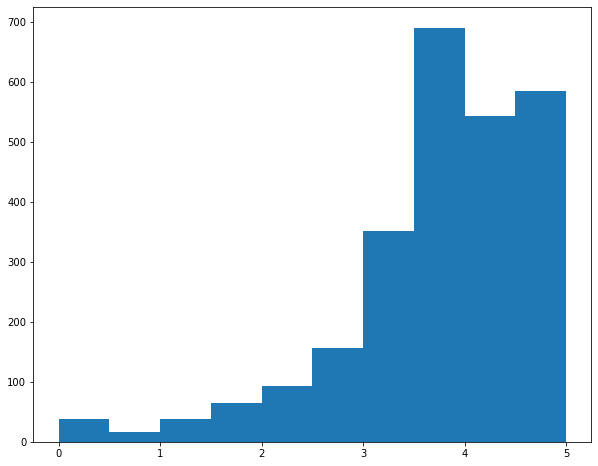

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.hist(df["Stars"])

In [26]:
df["Stars"].median()

3.75

In [27]:
len(df)

2575

In [30]:
len(df[df["Stars"] > 4.25])

589

In [34]:
df["binStars"] = pd.qcut(df["Stars"], q=2, labels=[0,1])
df["binStars"].value_counts()

0    1445
1    1130
Name: binStars, dtype: int64

In [36]:
# prepare dependent and independent variables
X = df.drop(["binStars", "Stars"], axis=1)
y = df["binStars"]

In [37]:
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

In [38]:
# set a baseline with DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

C:\Users\Scott\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [39]:
confusion_matrix(y_test, dummy_pred)

array([[163, 126],
       [120, 106]], dtype=int64)

In [40]:
#  TN  FP
#  FN  TP

In [42]:
print(classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57       289
           1       0.46      0.47      0.46       226

    accuracy                           0.52       515
   macro avg       0.52      0.52      0.52       515
weighted avg       0.52      0.52      0.52       515



###### DummyClasffier Accuracy = 52%

In [43]:
# Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

In [44]:
confusion_matrix(y_test, logreg_pred)

array([[208,  81],
       [ 78, 148]], dtype=int64)

In [45]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       289
           1       0.65      0.65      0.65       226

    accuracy                           0.69       515
   macro avg       0.69      0.69      0.69       515
weighted avg       0.69      0.69      0.69       515



###### Logistic Regression Accuracy = 69%

In [46]:
# Decision Tree Classifer
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [47]:
confusion_matrix(y_test, tree_pred)

array([[221,  68],
       [ 96, 130]], dtype=int64)

In [48]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       289
           1       0.66      0.58      0.61       226

    accuracy                           0.68       515
   macro avg       0.68      0.67      0.67       515
weighted avg       0.68      0.68      0.68       515



###### Decision Tree Accuracy = 68%

In [50]:
# Random Forest Classifier
rf = RandomForestClassifier().fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [51]:
confusion_matrix(y_test, rf_pred)

array([[213,  76],
       [ 93, 133]], dtype=int64)

In [52]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       289
           1       0.64      0.59      0.61       226

    accuracy                           0.67       515
   macro avg       0.67      0.66      0.66       515
weighted avg       0.67      0.67      0.67       515



###### Random Forest Accuracy = 67%

In [56]:
logreg.coef_[0]

array([ 0.44586096, -0.57425291, -0.40515646, -0.26093684, -0.90382851,
       -0.3783802 , -0.90497872,  0.34994435,  0.29503109,  0.14898236,
       -0.90446494,  0.19019281,  1.10649185, -0.32220107,  0.34235766,
       -0.57121867, -0.11494336,  0.81109379, -1.07810933,  1.82670609,
       -0.37390481,  0.57757335,  0.93654139, -0.18698374, -0.3382204 ,
        0.57912372, -0.4987849 ,  0.54866791,  0.06960093, -0.69753809,
       -0.42508443,  0.12506096, -0.57545625, -1.13139909, -0.40969823,
        0.53129506,  0.08676961,  0.14201406,  0.66237918,  1.06112797,
        0.73665056,  0.68126358, -0.74927233,  0.74591437, -0.17880267,
        0.2848446 , -0.72708825, -0.24012134])

In [63]:
logreg_feature_imp = pd.DataFrame({"feature": X.columns, "importance": logreg.coef_[0]})
logreg_feature_imp.sort_values("importance", ascending=False)

feature  importance
19          from_MyKuali    1.826706
12             from_MAMA    1.106492
39          in_Indonesia    1.061128
22         from_Nongshim    0.936541
17      from_Master Kong    0.811094
43          in_Singapore    0.745914
40              in_Japan    0.736651
41           in_Malaysia    0.681264
38          in_Hong Kong    0.662379
25            from_Paldo    0.579124
21           from_Nissin    0.577573
27    from_Samyang Foods    0.548668
35              is_Other    0.531295
0                isSpicy    0.445861
7           from_Indomie    0.349944
14             from_Mama    0.342358
8               from_JML    0.295031
45             in_Taiwan    0.284845
11        from_Lucky Me!    0.190193
9              from_KOKA    0.148982
37               is_Tray    0.142014
31     from_Vina Acecook    0.125061
36               is_Pack    0.086770
28  from_Sapporo Ichiban    0.069601
16         from_Maruchan   -0.114943
44        in_South Korea   -0.178803
23            from_Other   -0.186984
47                in_USA   -0.240121
3             hasSeafood   -0.260937
13            from_Maggi   -0.322201
24           from_Ottogi   -0.338220
20            from_Myojo   -0.373905
5        from_Batchelors   -0.378380
2                hasBeef   -0.405156
34                is_Cup   -0.409698
30            from_Vifon   -0.425084
26          from_Samyang   -0.498785
15            from_Mamee   -0.571219
1             hasChicken   -0.574253
32          from_Wai Wai   -0.575456
29          from_Ve Wong   -0.697538
46           in_Thailand   -0.727088
42              in_Other   -0.749272
4           from_Acecook   -0.903829
10             from_Koka   -0.904465
6              from_Doll   -0.904979
18      from_Mr. Noodles   -1.078109
33          from_Wei Lih   -1.131399

In [65]:
tree_feature_imp = pd.DataFrame({"feature": X.columns, "importance": tree.feature_importances_})
tree_feature_imp.sort_values("importance", ascending=False)[:10]

feature  importance
42     in_Other    0.102548
0       isSpicy    0.073889
1    hasChicken    0.068213
36      is_Pack    0.063965
3    hasSeafood    0.062265
34       is_Cup    0.046160
2       hasBeef    0.045560
21  from_Nissin    0.043184
23   from_Other    0.039763
46  in_Thailand    0.036025

In [66]:
rf_feature_imp = pd.DataFrame({"feature": X.columns, "importance": rf.feature_importances_})
rf_feature_imp.sort_values("importance", ascending=False)[:10]

feature  importance
0       isSpicy    0.089753
36      is_Pack    0.073246
42     in_Other    0.064877
1    hasChicken    0.062264
3    hasSeafood    0.060448
34       is_Cup    0.053232
2       hasBeef    0.043986
23   from_Other    0.043532
21  from_Nissin    0.042278
40     in_Japan    0.035460